1. Importing the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# No. of rows and columns
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [9]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


In [11]:
gold_data.drop(labels=['Date'],axis=1,inplace=True)

In [12]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


In [13]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
2285,2671.919922,124.589996,14.0600,15.5100,1.186789,2018,5,8
2286,2697.790039,124.330002,14.3700,15.5300,1.184722,2018,5,9
2287,2723.070068,125.180000,14.4100,15.7400,1.191753,2018,5,10
2288,2730.129883,124.489998,14.3800,15.5600,1.193118,2018,5,14
2289,2725.780029,122.543800,14.4058,15.4542,1.182033,2018,5,16


Check for missing values

In [14]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Year       0
Month      0
Day        0
dtype: int64

Check for duplicate values

In [15]:
gold_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [16]:
gold_data.duplicated().sum()

0

Statistical measures of data

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891,6.329258,15.644541
std,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271,3.591149,8.746132
min,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000,1.000000,1.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000,3.000000,8.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000,6.000000,15.500000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000,10.000000,23.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000,12.000000,31.000000


Check for correlation <br>
1. Positive Correlation -> if 2 variables are directly proportional <br>
2. Negative Correlation -> if 2 variables are inversly proportional <br>

In [18]:
correlation = gold_data.corr()

Constructing a heatmap for understanding correlation

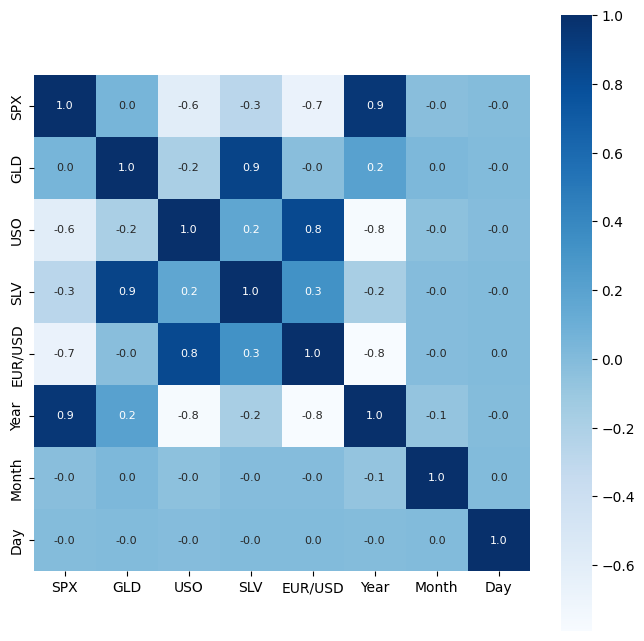

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [20]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64

C:\Users\Sanke\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


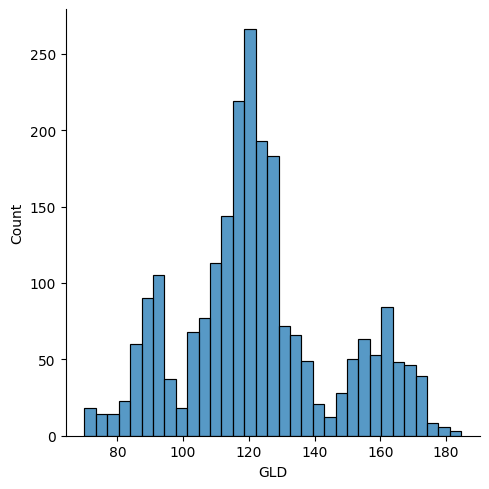

In [21]:
sns.displot(gold_data['GLD'])
plt.show()

Splitting the dataframe into independent and dependent features

In [22]:
X = gold_data.drop(labels=['GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD  Year  Month  Day
0     1447.160034  78.470001  15.1800  1.471692  2008      1    2
1     1447.160034  78.370003  15.2850  1.474491  2008      1    3
2     1411.630005  77.309998  15.1670  1.475492  2008      1    4
3     1416.180054  75.500000  15.0530  1.468299  2008      1    7
4     1390.189941  76.059998  15.5900  1.557099  2008      1    8
...           ...        ...      ...       ...   ...    ...  ...
2285  2671.919922  14.060000  15.5100  1.186789  2018      5    8
2286  2697.790039  14.370000  15.5300  1.184722  2018      5    9
2287  2723.070068  14.410000  15.7400  1.191753  2018      5   10
2288  2730.129883  14.380000  15.5600  1.193118  2018      5   14
2289  2725.780029  14.405800  15.4542  1.182033  2018      5   16

[2290 rows x 7 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into train and test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation ->Prediction on test data

In [28]:
test_data_pred = regressor.predict(X_test)

In [29]:
print(test_data_pred)

[168.13399862  82.72289986 115.87160047 127.36800095 120.02710135
 154.7106986  150.32789945 126.27690027 117.72529869 126.03590111
 115.60930196 170.90740083 140.93229971 167.74749765 115.03330003
 118.1354012  134.27690152 171.40640272 159.79000265 172.57749929
 155.06740045 124.19100044 174.90370003 156.85800357 125.39850081
  93.37679926  77.07370012 119.54720037 119.04349885 167.44109894
  88.0095006  125.40290079  91.85030008 117.65850019 121.13900004
 135.55230051 115.74720058 114.43460054 140.69029843 107.51260069
 105.58760253  86.95809742 126.51060088 117.55140065 155.3545992
 120.25649928 108.58079993 107.9188977   92.7201998  127.16809737
  75.41410024 114.07180005 120.77629977 111.27559932 118.80909896
 120.89829879 160.20100197 174.87800038 146.52599639  86.97279995
  93.76640049  86.86719875  89.58230053 119.2814007  126.35610074
 127.82859938 171.85730146 122.27519932 117.51159864  97.5438999
 168.37830079 142.17379921 132.58900146 120.74870104 123.6035988
 119.77020102

Compare Y_test and test_data_pred

In [30]:
score = metrics.r2_score(Y_test,test_data_pred)
print(score)

0.9953783140409124


Compare the actual values and predicted values in plot

In [31]:
Y_test = list(Y_test)

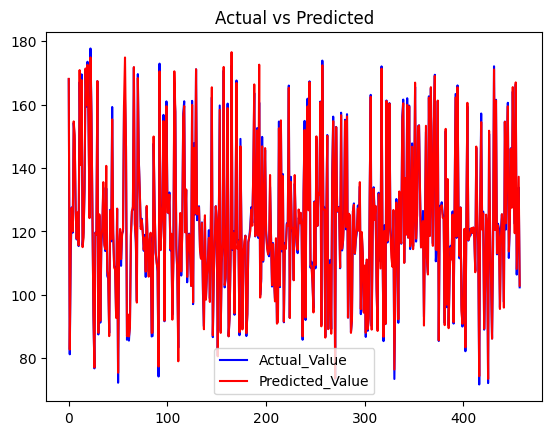

In [32]:
plt.plot(Y_test,color='blue',label='Actual_Value')
plt.plot(test_data_pred,color='red',label='Predicted_Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()